In [2]:
from sklearn.datasets import load_files

uza_train = load_files('.\\uza\\train', encoding='utf-8')
uza_test = load_files('.\\uza\\test', encoding='utf-8')

print(len(uza_train.data))
print(len(uza_test.data))

1385
462


In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer

vocab_size = 10000
embedding_dim = 64
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(uza_train.data)
word_index = tokenizer.word_index

dict(list(word_index.items())[0:10])

{'<OOV>': 1,
 '\r': 2,
 'ва': 3,
 'ўзбекистон': 4,
 'билан': 5,
 'республикаси': 6,
 'бўйича': 7,
 'учун': 8,
 '–': 9,
 'давлат': 10}

In [4]:
train_sequences = tokenizer.texts_to_sequences(uza_train.data)
test_sequences = tokenizer.texts_to_sequences(uza_test.data)

In [5]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


In [6]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                             input_length=max_length),
    # specify the number of convolutions that you want to learn, their size, and their activation function.
    # words will be grouped into the size of the filter in this case 5
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 64)           640000    
_________________________________________________________________
conv1d (Conv1D)              (None, 196, 128)          41088     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 689,994
Trainable params: 689,994
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
num_epochs = 10
history = model.fit(train_padded, uza_train.target, epochs=num_epochs, validation_data=(test_padded, uza_test.target), verbose=2)

Train on 1385 samples, validate on 462 samples
Epoch 1/10
1385/1385 - 4s - loss: 2.2179 - accuracy: 0.2245 - val_loss: 2.0498 - val_accuracy: 0.2835
Epoch 2/10
1385/1385 - 3s - loss: 1.8056 - accuracy: 0.3610 - val_loss: 1.6343 - val_accuracy: 0.3896
Epoch 3/10
1385/1385 - 3s - loss: 1.3641 - accuracy: 0.5278 - val_loss: 1.3415 - val_accuracy: 0.5303
Epoch 4/10
1385/1385 - 3s - loss: 0.9843 - accuracy: 0.7018 - val_loss: 1.1666 - val_accuracy: 0.5736
Epoch 5/10
1385/1385 - 3s - loss: 0.6479 - accuracy: 0.8137 - val_loss: 1.0679 - val_accuracy: 0.6320
Epoch 6/10
1385/1385 - 3s - loss: 0.4181 - accuracy: 0.8874 - val_loss: 1.1014 - val_accuracy: 0.6667
Epoch 7/10
1385/1385 - 3s - loss: 0.2550 - accuracy: 0.9538 - val_loss: 1.1163 - val_accuracy: 0.6840
Epoch 8/10
1385/1385 - 3s - loss: 0.1563 - accuracy: 0.9798 - val_loss: 1.1537 - val_accuracy: 0.6840
Epoch 9/10
1385/1385 - 3s - loss: 0.0963 - accuracy: 0.9863 - val_loss: 1.2550 - val_accuracy: 0.6775
Epoch 10/10
1385/1385 - 3s - loss: 

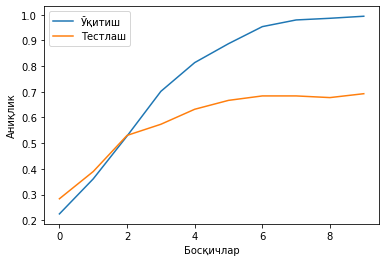

In [11]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_' + string])
    plt.xlabel("Босқичлар")
    plt.ylabel("Аниқлик")
    plt.legend(['Ўқитиш', 'Тестлаш'])
    plt.show()


plot_graphs(history, "accuracy")